In [51]:
%matplotlib inline

import os
import time
import copy
import pandas as pd
import numpy as np

from random import seed
from random import randint
import random

import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms, models

from PIL import Image
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings("ignore")

from tqdm import tqdm_notebook as tqdm


#input_dir = os.path.join("k")
train_dir = os.path.join("/home/nitin/Desktop/imet -2019/imet-2019-fgvc6/train")
test_dir  = os.path.join("test")
labels_csv= os.path.join('labels.csv')
train_csv = os.path.join('train.csv')
resnet_weights_path = os.path.join('/home/nitin/Desktop/imet -2019/resnet50.pth')

In [52]:
import torch 
import numpy as np 
import torchvision.transforms as transforms 
import torchvision 
import torch.nn.functional as F

In [53]:
# Imports here
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt

import torch
import numpy as np
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms, models
from PIL import Image
from collections import OrderedDict
import json
import torchvision 
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

import torchvision
import torchvision.transforms as transforms
import pdb

torch.set_printoptions(linewidth=120)
torch.set_grad_enabled(True) 
from torch.utils.tensorboard import SummaryWriter


In [54]:
def seed_all(seed=27):
    """https://pytorch.org/docs/stable/notes/randomness.html"""
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
seed_all(27)

In [55]:
BATCH_SIZE = 100
NUM_EPOCHS = 1
PERCENTILE = 99.7
LEARNING_RATE = 0.1
DISABLE_TQDM = True

In [56]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [57]:
#df = pd.read_csv(labels_csv)
#attribute_dict = dict(zip(df.attribute_id,df.attribute_name))
#del df,labels_csv

In [58]:
df = pd.read_csv(labels_csv)


In [59]:
print(df)

      attribute_id                   attribute_name
0                0                 culture::abruzzi
1                1              culture::achaemenid
2                2                  culture::aegean
3                3                  culture::afghan
4                4           culture::after british
5                5            culture::after german
6                6   culture::after german original
7                7           culture::after italian
8                8  culture::after russian original
9                9                culture::akkadian
10              10        culture::alexandria-hadra
11              11                culture::algerian
12              12                  culture::alsace
13              13                culture::american
14              14    culture::american or european
15              15               culture::amsterdam
16              16                 culture::ansbach
17              17                 culture::antwerp
18          

In [60]:
attribute_dict = dict(zip(df.attribute_id,df.attribute_name))
print(attribute_dict)


{0: 'culture::abruzzi', 1: 'culture::achaemenid', 2: 'culture::aegean', 3: 'culture::afghan', 4: 'culture::after british', 5: 'culture::after german', 6: 'culture::after german original', 7: 'culture::after italian', 8: 'culture::after russian original', 9: 'culture::akkadian', 10: 'culture::alexandria-hadra', 11: 'culture::algerian', 12: 'culture::alsace', 13: 'culture::american', 14: 'culture::american or european', 15: 'culture::amsterdam', 16: 'culture::ansbach', 17: 'culture::antwerp', 18: 'culture::apulian', 19: 'culture::arabian', 20: 'culture::aragon', 21: 'culture::arica', 22: 'culture::asia minor', 23: 'culture::assyrian', 24: 'culture::atlantic watershed', 25: 'culture::attic', 26: 'culture::augsburg', 27: 'culture::augsburg decoration', 28: 'culture::augsburg original', 29: 'culture::austrian', 30: 'culture::avignon', 31: 'culture::avon', 32: 'culture::aztec', 33: 'culture::babylonian', 34: 'culture::babylonian or kassite', 35: 'culture::bactria-margiana archaeological comp

In [61]:
del df,labels_csv # (del command is used for delelting ## here deleting df and labels_csv)

In [62]:
attribute_dict

{0: 'culture::abruzzi',
 1: 'culture::achaemenid',
 2: 'culture::aegean',
 3: 'culture::afghan',
 4: 'culture::after british',
 5: 'culture::after german',
 6: 'culture::after german original',
 7: 'culture::after italian',
 8: 'culture::after russian original',
 9: 'culture::akkadian',
 10: 'culture::alexandria-hadra',
 11: 'culture::algerian',
 12: 'culture::alsace',
 13: 'culture::american',
 14: 'culture::american or european',
 15: 'culture::amsterdam',
 16: 'culture::ansbach',
 17: 'culture::antwerp',
 18: 'culture::apulian',
 19: 'culture::arabian',
 20: 'culture::aragon',
 21: 'culture::arica',
 22: 'culture::asia minor',
 23: 'culture::assyrian',
 24: 'culture::atlantic watershed',
 25: 'culture::attic',
 26: 'culture::augsburg',
 27: 'culture::augsburg decoration',
 28: 'culture::augsburg original',
 29: 'culture::austrian',
 30: 'culture::avignon',
 31: 'culture::avon',
 32: 'culture::aztec',
 33: 'culture::babylonian',
 34: 'culture::babylonian or kassite',
 35: 'culture::b

In [63]:
attribute_dict.items()

dict_items([(0, 'culture::abruzzi'), (1, 'culture::achaemenid'), (2, 'culture::aegean'), (3, 'culture::afghan'), (4, 'culture::after british'), (5, 'culture::after german'), (6, 'culture::after german original'), (7, 'culture::after italian'), (8, 'culture::after russian original'), (9, 'culture::akkadian'), (10, 'culture::alexandria-hadra'), (11, 'culture::algerian'), (12, 'culture::alsace'), (13, 'culture::american'), (14, 'culture::american or european'), (15, 'culture::amsterdam'), (16, 'culture::ansbach'), (17, 'culture::antwerp'), (18, 'culture::apulian'), (19, 'culture::arabian'), (20, 'culture::aragon'), (21, 'culture::arica'), (22, 'culture::asia minor'), (23, 'culture::assyrian'), (24, 'culture::atlantic watershed'), (25, 'culture::attic'), (26, 'culture::augsburg'), (27, 'culture::augsburg decoration'), (28, 'culture::augsburg original'), (29, 'culture::austrian'), (30, 'culture::avignon'), (31, 'culture::avon'), (32, 'culture::aztec'), (33, 'culture::babylonian'), (34, 'cul

In [64]:
tag_count = 0 
culture_count = 0
for idx,data in attribute_dict.items():
    print(data)

culture::abruzzi
culture::achaemenid
culture::aegean
culture::afghan
culture::after british
culture::after german
culture::after german original
culture::after italian
culture::after russian original
culture::akkadian
culture::alexandria-hadra
culture::algerian
culture::alsace
culture::american
culture::american or european
culture::amsterdam
culture::ansbach
culture::antwerp
culture::apulian
culture::arabian
culture::aragon
culture::arica
culture::asia minor
culture::assyrian
culture::atlantic watershed
culture::attic
culture::augsburg
culture::augsburg decoration
culture::augsburg original
culture::austrian
culture::avignon
culture::avon
culture::aztec
culture::babylonian
culture::babylonian or kassite
culture::bactria-margiana archaeological complex
culture::balinese
culture::bavaria
culture::bayreuth
culture::beautiran
culture::beauvais
culture::belgian
culture::berlin
culture::birmingham
culture::boeotian
culture::bohemian
culture::bologna
culture::bordeaux
culture::bow
culture::b

In [65]:
data.split("::")[1]

'zodiac'

In [66]:
data.split("::")[0]

'tag'

In [67]:
tag_count = 0 
culture_count = 0
for idx,data in attribute_dict.items():
    if data.split("::")[0] == 'tag':
        tag_count+=1
    if data.split("::")[0] == 'culture':
        culture_count+=1
print('total_categories: {0}\ntag_categories: {1} \nculture_categories: {2} ' \
      .format(len(attribute_dict),tag_count,culture_count))


total_categories: 1103
tag_categories: 705 
culture_categories: 398 


In [68]:
#cross check your results
assert tag_count+culture_count == len(attribute_dict)


In [69]:
output_dim = len(attribute_dict) 

In [70]:
print(output_dim)

1103


In [71]:
len(attribute_dict) 

1103

In [72]:
df = pd.read_csv(train_csv)
df.head()

,id,attribute_ids
0,1000483014d91860,147 616 813
1,1000fe2e667721fe,51 616 734 813
2,1001614cb89646ee,776
3,10041eb49b297c08,51 671 698 813 1092
4,100501c227f8beea,13 404 492 903 1093


In [73]:
labels_dict = dict(zip(df.id,df.attribute_ids))

In [74]:
labels_dict

{'1000483014d91860': '147 616 813',
 '1000fe2e667721fe': '51 616 734 813',
 '1001614cb89646ee': '776',
 '10041eb49b297c08': '51 671 698 813 1092',
 '100501c227f8beea': '13 404 492 903 1093',
 '10050ed12fbad46d': '189 279 774 800 1051',
 '100543a032517972': '188 1034',
 '1006665c0aad488': '1010 1053',
 '1007057734dba6df': '189 541 542 993',
 '1008abd71f3ed5bc': '70 776 794 813 1046 1092',
 '1008c7837081f985': '79 1062',
 '1009f5737fc77f2': '188 668 754',
 '100a0dcde728cb36': '51 675',
 '100a58282c6584bf': '147 716 903 1092',
 '100b45b7c4020f5d': '161 489 704 1100',
 '100bb499d37d0751': '188 535',
 '100bbf5e832083d3': '51 212 426 586 940',
 '100d750286e85bf3': '13 616',
 '100e1e65a6d7850e': '737 1009 1046',
 '100ef61c00e1b5d3': '25 161 784 1059',
 '100efeead4d0f90c': '189 542 670 813 949 1092',
 '100f00204964e81d': '147 189 418 742 1072 1092',
 '1010af4eeb3f95ee': '194 480 483 485 813 1099',
 '1012a188a1fd6166': '13 813 896',
 '1014806043fa009': '156 1084',
 '1014ac8807369589': '103 180 

In [75]:
idx = len(os.listdir(train_dir))
print(idx)

109237


In [76]:
number = randint(0,idx)
print(number)

84999


In [77]:
image_name = os.listdir(train_dir)[number]
print(image_name)

a597018d667046c0.png


In [78]:
x = Image.open(os.path.join(train_dir,image_name))
print(x)

<PIL.PngImagePlugin.PngImageFile image mode=RGB size=300x342 at 0x7F64B84F8048>


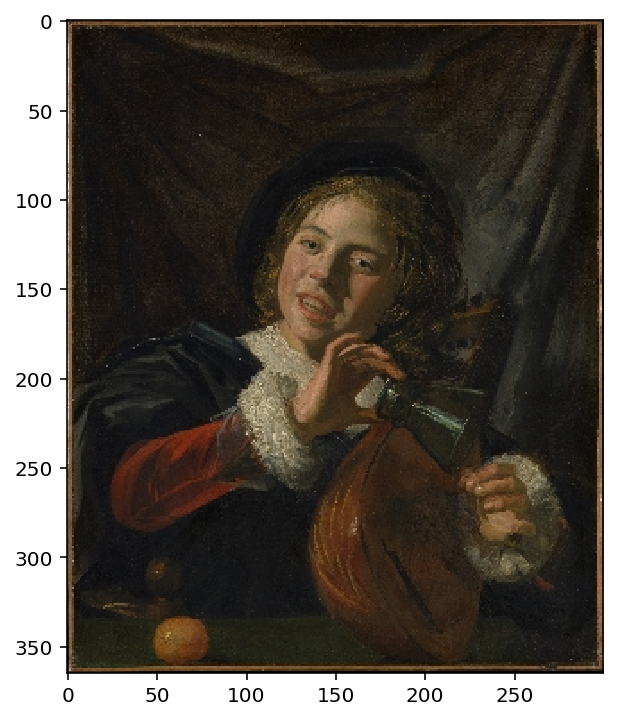

In [79]:
idx = len(os.listdir(train_dir))
number = randint(0,idx)
image_name = os.listdir(train_dir)[number]
def imshow(image):
    plt.figure(figsize=(6, 6))
    plt.imshow(image)
    plt.show()
# Example image
x = Image.open(os.path.join(train_dir,image_name))

imshow(x)

In [80]:
y = labels_dict[os.listdir(train_dir)[number].split('.')[0]].split()
print(y)

['492', '795', '896']


tag::men


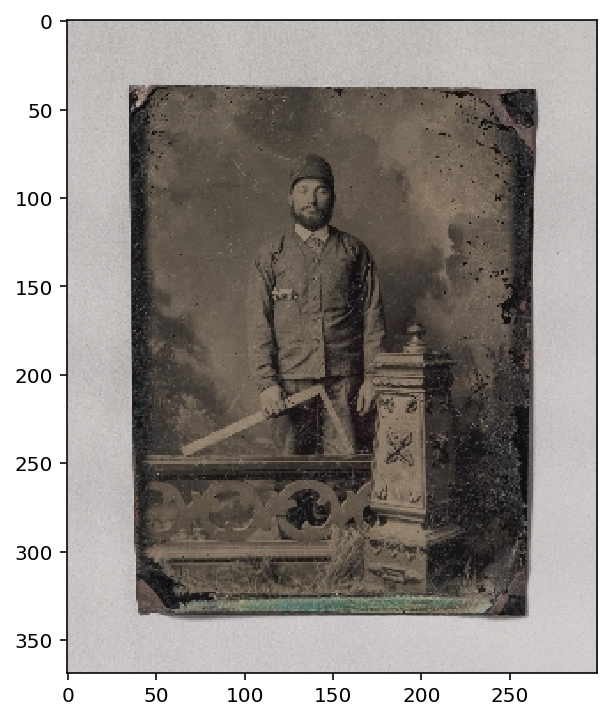

In [81]:
idx = len(os.listdir(train_dir))
number = randint(0,idx)
image_name = os.listdir(train_dir)[number]
def imshow(image):
    plt.figure(figsize=(6, 6))
    plt.imshow(image)
    plt.show()
# Example image
x = Image.open(os.path.join(train_dir,image_name))
for i in labels_dict[os.listdir(train_dir)[number].split('.')[0]].split():
    print(attribute_dict[int(i)])
np.array(x).shape
imshow(x)

In [82]:
# need to add more transforms here
data_transforms = transforms.Compose([
        transforms.Resize((32,32)),
        transforms.ToTensor(),
    ])

# Custom Dataset class

In [83]:
from torch.utils import data
class ImageData(data.Dataset):
    def __init__(self,df,dirpath,transform,test = False):
        self.df = df
        self.test = test
        self.dirpath = dirpath
        self.conv_to_tensor = transform
        #image data 
        if not self.test:
            self.image_arr = np.asarray(str(self.dirpath)+'/'+self.df.iloc[:, 0]+'.png')
        else:
            self.image_arr = np.asarray(str(self.dirpath)+'/'+self.df.iloc[:, 0])
        
        #labels data
        if not self.test:
             self.label_df = self.df.iloc[:,1]
        
        # Calculate length of df
        self.data_len = len(self.df.index)

    def __len__(self):
        return self.data_len
    
    def __getitem__(self, idx):
        image_name = self.image_arr[idx]
        img = Image.open(image_name)
        img_tensor = self.conv_to_tensor(img)
        if not self.test:
            image_labels = self.label_df[idx]
            label_tensor = torch.zeros((1, output_dim))
            for label in image_labels.split():
                label_tensor[0, int(label)] = 1
            image_label = torch.tensor(label_tensor,dtype= torch.float32)
            return (img_tensor,image_label.squeeze())
        return (img_tensor)

In [84]:
#df = pd.read_csv(train_csv)
# if you want to run on less data to quickly check
df = pd.read_csv(train_csv).head(5)
from sklearn.model_selection import train_test_split
train_df,val_df = train_test_split(df, test_size=0.20)
train_df = train_df.reset_index(drop=True)
val_df = val_df.reset_index(drop=True)
print(f"Validation_Data Length: {len(val_df)}\n Train_Data Length: {len(train_df)}")

Validation_Data Length: 1
 Train_Data Length: 4


In [85]:
# Train dataset
train_dataset = ImageData(train_df,train_dir,data_transforms)
train_loader = data.DataLoader(dataset=train_dataset,batch_size=BATCH_SIZE,shuffle=False)

# validation dataset
val_dataset = ImageData(val_df,train_dir,data_transforms)
val_loader = data.DataLoader(dataset=val_dataset,batch_size=BATCH_SIZE,shuffle=False)

# test dataset
test_df = pd.DataFrame(os.listdir(test_dir))
test_dataset = ImageData(test_df,test_dir,data_transforms,test = True)
test_loader = data.DataLoader(dataset=test_dataset,batch_size=BATCH_SIZE,shuffle=False)

dataloaders_dict = {'train':train_loader, 'val':val_loader}

In [86]:
features, labels = next(iter(train_loader))
print(f'Train Features: {features.shape}\nTrain Labels: {labels.shape}')
print()
features, labels = next(iter(val_loader))
print(f'Validation Features: {features.shape}\nValidation Labels: {labels.shape}')
print()
features = next(iter(test_loader))
print(f'Test Features: {features.shape}\n')

Train Features: torch.Size([4, 3, 32, 32])
Train Labels: torch.Size([4, 1103])

Validation Features: torch.Size([1, 3, 32, 32])
Validation Labels: torch.Size([1, 1103])

Test Features: torch.Size([90, 3, 32, 32])



In [87]:
class baseBlock(torch.nn.Module):
    expansion = 1
    def __init__(self,input_planes,planes,stride=1,dim_change=None):
        super(baseBlock,self).__init__()
        #declare convolutional layers with batch norms
        self.conv1 = torch.nn.Conv2d(input_planes,planes,stride=stride,kernel_size=3,padding=1)
        self.bn1   = torch.nn.BatchNorm2d(planes)
        self.conv2 = torch.nn.Conv2d(planes,planes,stride=1,kernel_size=3,padding=1)
        self.bn2   = torch.nn.BatchNorm2d(planes)
        self.dim_change = dim_change
    def forward(self,x):
        #Save the residue
        res = x
        output = F.relu(self.bn1(self.conv1(x)))
        output = self.bn2(self.conv2(output))

        if self.dim_change is not None:
            res = self.dim_change(res)
        
        output += res
        output = F.relu(output)

        return output

In [88]:
class bottleNeck(torch.nn.Module):
    expansion = 4
    def __init__(self,input_planes,planes,stride=1,dim_change=None):
        super(bottleNeck,self).__init__()

        self.conv1 = torch.nn.Conv2d(input_planes,planes,kernel_size=1,stride=1)
        self.bn1 = torch.nn.BatchNorm2d(planes)
        self.conv2 = torch.nn.Conv2d(planes,planes,kernel_size=3,stride=stride,padding=1)
        self.bn2 = torch.nn.BatchNorm2d(planes)
        self.conv3 = torch.nn.Conv2d(planes,planes*self.expansion,kernel_size=1)
        self.bn3 = torch.nn.BatchNorm2d(planes*self.expansion)
        self.dim_change = dim_change
    
    def forward(self,x):
        res = x
        
        output = F.relu(self.bn1(self.conv1(x)))
        output = F.relu(self.bn2(self.conv2(output)))
        output = self.bn3(self.conv3(output))

        if self.dim_change is not None:
            res = self.dim_change(res)
        
        output += res
        output = F.relu(output)
        return output

In [89]:
class ResNet(torch.nn.Module):
    def __init__(self,block,num_layers,classes=2):
        super(ResNet,self).__init__()
        #according to research paper:
        self.input_planes = 64
        self.conv1 = torch.nn.Conv2d(3,64,kernel_size=3,stride=1,padding=1)
        self.bn1   = torch.nn.BatchNorm2d(64)
        self.layer1 = self._layer(block,64,num_layers[0],stride=1)
        self.layer2 = self._layer(block,128,num_layers[1],stride=2)
        self.layer3 = self._layer(block,256,num_layers[2],stride=2)
        self.layer4 = self._layer(block,512,num_layers[3],stride=2)
        self.averagePool = torch.nn.AvgPool2d(kernel_size=4,stride=1)
        self.fc    =  torch.nn.Linear(512*block.expansion,classes)
    
    def _layer(self,block,planes,num_layers,stride=1):
        dim_change = None
        if stride!=1 or planes != self.input_planes*block.expansion:
            dim_change = torch.nn.Sequential(torch.nn.Conv2d(self.input_planes,planes*block.expansion,kernel_size=1,stride=stride),
                                             torch.nn.BatchNorm2d(planes*block.expansion))
        netLayers =[]
        netLayers.append(block(self.input_planes,planes,stride=stride,dim_change=dim_change))
        self.input_planes = planes * block.expansion
        for i in range(1,num_layers):
            netLayers.append(block(self.input_planes,planes))
            self.input_planes = planes * block.expansion
        
        return torch.nn.Sequential(*netLayers)

    def forward(self,x):
        x = F.relu(self.bn1(self.conv1(x)))

        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)

        x = F.avg_pool2d(x,4)
        x = x.view(x.size(0),-1)
        x = self.fc(x)

        return x

In [90]:

    #ResNet-18 
    #net = ResNet(baseBlock,[2,2,2,2],10)

    #ResNet-50
    NeuralNet =  ResNet(bottleNeck,[3,4,6,3])
    NeuralNet.to(device)
    

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layer1): Sequential(
    (0): bottleNeck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1))
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (dim_change): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1))
        (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (1): bottleNeck(
      (conv1): Conv2d(256, 64, kernel_size=(1, 1), stride=(1, 1))

# Model Using Resnet50

In [35]:
resnet_cls = models.resnet50()
resnet_cls.load_state_dict(torch.load(resnet_weights_path))

class AvgPool(nn.Module):
    def forward(self, x):
        return F.avg_pool2d(x, x.shape[2:])
    
class ResNet50(nn.Module):
    def __init__(self,num_outputs):
        super(ResNet50,self).__init__()
        self.resnet = resnet_cls
        layer4 = self.resnet.layer4
        self.resnet.layer4 = nn.Sequential(
                                    nn.Dropout(0.5),
                                    layer4
                                    )
        self.resnet.avgpool = AvgPool()
        self.resnet.fc = nn.Linear(2048, num_outputs)
        for param in self.resnet.parameters():
            param.requires_grad = False

        for param in self.resnet.layer4.parameters():
            param.requires_grad = True

        for param in self.resnet.fc.parameters():
            param.requires_grad = True
            
    def forward(self,x):
        out = self.resnet(x)
        return out
    
NeuralNet = ResNet50(num_outputs = output_dim) 

In [91]:

NeuralNet

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layer1): Sequential(
    (0): bottleNeck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1))
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (dim_change): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1))
        (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (1): bottleNeck(
      (conv1): Conv2d(256, 64, kernel_size=(1, 1), stride=(1, 1))

In [92]:
total_params = sum(p.numel() for p in NeuralNet.parameters())
print(f'{total_params:,} total parameters.')
total_trainable_params = sum(p.numel() for p in NeuralNet.parameters() if p.requires_grad)
print(f'{total_trainable_params:,} training parameters.')

23,531,010 total parameters.
23,531,010 training parameters.


In [93]:
print("TRAINING")
print("training examples: ",len(train_dataset))
print("batch size: ",BATCH_SIZE)
print("batches available: ",len(train_loader))
print()
print("TESTING")
print("validation examples: ",len(val_dataset))
print("batch size: ",BATCH_SIZE)
print("batches available: ",len(val_loader))
print()
print("VALIDATION")
print("testing examples: ",len(test_dataset))
print("batch size: ",BATCH_SIZE)
print("batches available: ",len(test_loader))

TRAINING
training examples:  4
batch size:  100
batches available:  1

TESTING
validation examples:  1
batch size:  100
batches available:  1

VALIDATION
testing examples:  90
batch size:  100
batches available:  1


# Train the Model

In [94]:
NeuralNet = NeuralNet.to(device)
optimizer = optim.Adam(NeuralNet.parameters(),lr = LEARNING_RATE)
loss_func = torch.nn.BCEWithLogitsLoss()
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer,patience = 2)
best_loss = np.inf
for epoch in range(NUM_EPOCHS):
    for phase in ['train', 'val']:
        start_time = time.time()
        if phase == 'train':
            NeuralNet.train()
        else:
            NeuralNet.eval()
            
        running_loss = 0.0
        for images_batch, labels_batch in tqdm(dataloaders_dict[phase],disable = DISABLE_TQDM):
            images_batch = images_batch.to(device)
            labels_batch = labels_batch.to(device)
            
            optimizer.zero_grad()
            
            with torch.set_grad_enabled(phase == 'train'):
                pred_batch = NeuralNet(images_batch)
                loss = loss_func(pred_batch,labels_batch)
                
            if phase == 'train':
                loss.backward()
                optimizer.step()
                
            running_loss += loss.item() * images_batch.size(0)    
        epoch_loss = running_loss / len(dataloaders_dict[phase].dataset)            

        if phase == 'val' and epoch_loss < best_loss:            
            print("model val_loss Improved from {:.8f} to {:.8f}".format(best_loss,epoch_loss))
            best_loss = epoch_loss
            best_model_wts = copy.deepcopy(NeuralNet.state_dict())
        
        if phase == 'val':
            scheduler.step(epoch_loss)
        
        elapsed_time = time.time()-start_time
        print("Phase: {} | Epoch: {}/{} | {}_loss:{:.8f} | Time: {:.4f}s".format(phase,
                                                                              epoch+1,
                                                                              NUM_EPOCHS,
                                                                              phase,
                                                                              epoch_loss,
                                                                              elapsed_time))
#NeuralNet.load_state_dict(best_model_wts)

Exception ignored in: <generator object tqdm_notebook.__iter__ at 0x7f64bb0149a8>
Traceback (most recent call last):
  File "/home/nitin/anaconda3/lib/python3.7/site-packages/tqdm/_tqdm_notebook.py", line 228, in __iter__
    self.sp(bar_style='danger')
AttributeError: 'tqdm_notebook' object has no attribute 'sp'


ValueError: Target size (torch.Size([4, 1103])) must be the same as input size (torch.Size([4, 2]))

# Predictions from the model

In [40]:
NeuralNet.eval()
predictions = np.zeros((len(test_dataset), output_dim))
i = 0
for test_batch in tqdm(test_loader,disable = DISABLE_TQDM):
    test_batch = test_batch.to(device)
    batch_prediction = NeuralNet(test_batch).detach().cpu().numpy()
    predictions[i * BATCH_SIZE:(i+1) * BATCH_SIZE, :] = batch_prediction
    i+=1

# Generating submission 

In [41]:
predicted_class_idx = []
for i in range(len(predictions)):         
    idx_list = np.where(predictions[i] > np.percentile(predictions[i],PERCENTILE))    
    predicted_class_idx.append(idx_list[0])

In [42]:
test_df['attribute_ids'] = predicted_class_idx
test_df['attribute_ids'] = test_df['attribute_ids'].apply(lambda x : ' '.join(map(str,list(x))))
test_df = test_df.rename(columns={0: 'id'})
test_df['id'] = test_df['id'].apply(lambda x : x.split('.')[0])
test_df.head()

,id,attribute_ids
0,1a79d203d79c5163,147 189 813 1092
1,1a204d327a6475e4,147 189 813 1092
2,1a393da6135eb1a8,147 189 813 1092
3,1a294d9a33fba200,147 189 813 1092
4,1a004e0662ac9844,147 189 813 1092


In [43]:
test_df.to_csv('submission.csv',index = False)